In [12]:
import numpy as np
import math as mt
def coeff(i):
    return -(6*i+mt.sin(i**2)*mt.cos(i**4)/i)
n = 100
M=np.zeros((n,n))
M[0,0] = 10
M[n-1,n-1] = 1
M[n-1,n-2] = 1
M[n-2,n-1] = 1
for i in range(1,n-1):
    M[i, i] = coeff(i)
    M[i, i-1] = i
    M[i-1, i] = 1+mt.cos(i**2)/i
np.set_printoptions(suppress=True, precision =4, linewidth=100)
print(M)

[[  10.        1.5403    0.     ...,    0.        0.        0.    ]
 [   1.       -6.4546    0.6732 ...,    0.        0.        0.    ]
 [   0.        2.      -12.3624 ...,    0.        0.        0.    ]
 ..., 
 [   0.        0.        0.     ..., -581.9997    0.9899    0.    ]
 [   0.        0.        0.     ...,   98.     -587.9995    1.    ]
 [   0.        0.        0.     ...,    0.        1.        1.    ]]


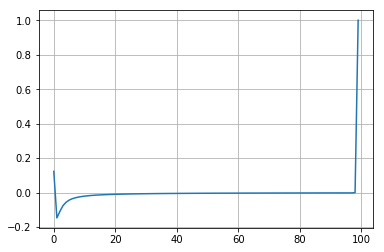

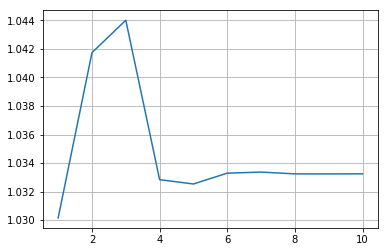

In [13]:
import copy
import matplotlib.pyplot as plt
rk=np.zeros(n)
tauk = np.zeros(n)
eps = 0.001
b = list()
for i in range(n):
    b.append(1)
xk = np.zeros(n)
for i in range(n):
    xk[i]= 1
xk1 = np.zeros(n)
xx = list()
for i in range(n):
    xx.append(i)
norma = 1
normax = list()
mx = list()
m = 0
while(norma>eps):
    N = 0
    for i in range(n):
        sum = 0
        for j in range(n):
            sum+=M[i,j]*xk[j]
        rk[i] = b[i] - sum
        N+=rk[i]**2
    norma = mt.sqrt(N)
    for i in range(n):
        sum =0
        for j in range(n):
            sum+=M[i,j]*rk[j]
        tauk[i] = sum*rk[i]/(sum**2)
    for i in range(n):
        xk1[i]=xk[i]+tauk[i]*rk[i]
    xk = copy.copy(xk1)
    xk1 = np.zeros(n)
    m+=1
    mx.append(m)
    sumx =0
    for i in range(n):
        sumx+=xk[i]**2
    normax.append(mt.sqrt(sumx))
plt.plot(xx, xk)
plt.grid()
plt.show()
plt.plot(mx, normax)
plt.grid()
plt.show()

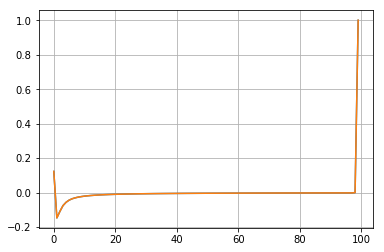

In [14]:
import numpy as np
# b = np.zeros(n)
# for i in range(n):
#     b[i]=1
prov = np.linalg.solve(M, b)
# print(prov)
plt.plot(xx, xk)
plt.plot(xx, prov)
plt.grid()
plt.show()